Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-09-15 11:20:23.735640


- ASSIGNMENT: ode-nla-1
- POINTS: 2
- CATEGORY: homework
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-09-18 23:59:59
- GRADER: Noriyuki Yoshio


Suppose you want to solve a difficult nonlinear algebraic equation that cannot readily be solved with algebra. For example, consider $f(x) = x e^{-x}$, and you seek to find the value of $x$ that makes this function equal to 0.1. One way to do this is to use a nonlinear algebra solver. In this problem, we will consider a way to solve it by integrating a differential equation.

The idea is to derive the derivative of the function, $f'(x)$, and then solve the initial value problem with an event function that finds the solution you want.




# First plot the function



You should plot the function to see if there is a solution. Consider an x-range from 0 to 5. Comment on whether there are any solutions, and if so how many and approximately where they are.



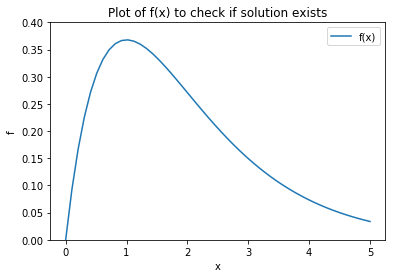

In [5]:
# f(x) plot

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x) * x

x = np.linspace(0, 5)

plt.plot(x, f(x), label = 'f(x)')
plt.ylim([0, 0.4])
plt.title('Plot of f(x) to check if solution exists')
plt.ylabel('f')
plt.xlabel('x')
plt.legend()
plt.show()

1. From the above graph, it is observed that the function's value in the given range varies from 0 to slightly more than 0.35 and so the value of f(x) = 0.1 is possible.
2. From the graph, 2 solutions are observable  at approximately x = 0.1 and x = 3.5 for the f(x) = 0.1 scenario.


# Derive f'(x)



This should be done by hand, and the result described in the next cell.



<center>$f'(x) = (1 - x)\times e^{-x}$

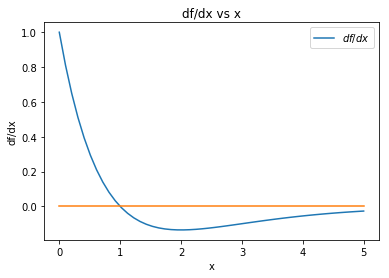

In [2]:
# For f'(x) 

import numpy as np
import matplotlib.pyplot as plt

# Differentiating f(x), we get:

def dfdx(x):
    return np.exp(-x) * (1 - x)

x = np.linspace(0, 5)

#f'(x) plot
plt.plot(x, dfdx(x), label = '$df/dx$')
plt.plot(x, np.zeros(len(x)))
plt.title('df/dx vs x')
plt.ylabel('df/dx')
plt.xlabel('x')
plt.legend()
plt.show()

The differential of f(x) turns from positive to negative at x = 1 (meaning this is the point of maxima).



# Solve the ode



Now that you have an $f'(x)$ Solve the initial value problem with $f(0)$ over the x-range that you plotted the original function on. Use an event function to identify points where $f(x)=0.1$.

Prepare a plot of the solution that has the following features:

1.  Plot the original function provided in this problem.
2.  Plot the solution you got from integrating $f'(x)$.
3.  Plot where your solution points you found are.
4.  



In [3]:
import numpy as np
from scipy.integrate import solve_ivp
f0 = np.array([0])
x_range = np.linspace(0, 5)
teval = np.linspace(0, 5)

def dfdx(x, y):
    return np.exp(-x) * (1 - x)

def objective(x, y):
    return y[0] - 0.1

objective.terminal = False

sol = solve_ivp(fun = dfdx, t_span = (0, 5), y0 = f0, t_eval = teval, events = objective)
ans = sol.t_events[0]
sol.message

'The solver successfully reached the end of the integration interval.'

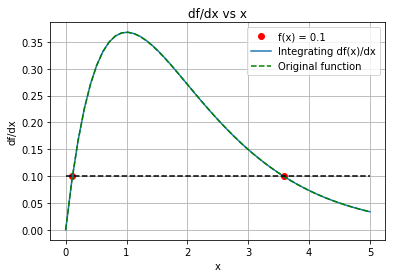

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(ans, f(ans), 'ro', label = 'f(x) = 0.1')
plt.plot(sol.t, sol.y[0], label = 'Integrating df(x)/dx')
plt.plot(x, f(x), 'g--', label = 'Original function')
plt.plot(x, 0.1 * np.ones(len(x)), '--k')
plt.title('df/dx vs x')
plt.ylabel('df/dx')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()